In [25]:
import gymnasium as gym
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results

In [26]:
PASTEL_COLORS = ['#5DADE2', '#48C9B0', '#45B39D', '#E74C3C', '#F5B041', '#DC7633']

def plot_learning_results(log_folders, labels, title='Training Learning Curve', xlabel='Timesteps', ylabel='Rewards', second_color=False):
    plt.figure(figsize=(18, 8))

    for i, (log_folder, label) in enumerate(zip(log_folders, labels)):
        x, y = ts2xy(load_results(log_folder), 'timesteps')
        y = np.convolve(y, np.ones(50)/50, mode='valid')  # Moving average
        x = x[len(x) - len(y):]  # Trim x to match y length after convolution
        plt.plot(x, y, label=label, linewidth=2, color=PASTEL_COLORS[i if not second_color else i+3])

    # Title and labels
    plt.title(title, fontsize=18, fontweight='bold', pad=20)
    plt.xlabel(xlabel, fontsize=14, labelpad=10)
    plt.ylabel(ylabel, fontsize=14, labelpad=10)

    # Customize ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

    # Add legend
    plt.legend(fontsize=12, loc='best')

    # Show plot
    plt.show()


In [27]:
def plot_violin(log_folders, labels, title='Violin Plot of Rewards', xlabel='Configuration', ylabel='Rewards', second_color=False):
    data = []
    plt.figure(figsize=(18, 8))

    for log_folder, label in zip(log_folders, labels):
        x, y = ts2xy(load_results(log_folder), 'timesteps')
        y = np.convolve(y, np.ones(50) / 50, mode='valid')  # Moving average
        data.append(y)

    # Create the violin plot
    parts = plt.violinplot(data, showmeans=True)

    # Customizing the appearance of the violin plot
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(PASTEL_COLORS[i if not second_color else i+3])
        pc.set_edgecolor('#282724')
        pc.set_linewidth(1.4)
        pc.set_alpha(1)

    # Set titles and labels
    plt.title(title, fontsize=18, fontweight='bold', pad=20)
    plt.xlabel(xlabel, fontsize=14, labelpad=10)
    plt.ylabel(ylabel, fontsize=14, labelpad=10)

    # Set x-ticks to the labels
    plt.xticks(range(1, len(labels) + 1), labels, fontsize=12)
    plt.yticks(fontsize=12)

    # Add grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

    # Show plot
    plt.show()

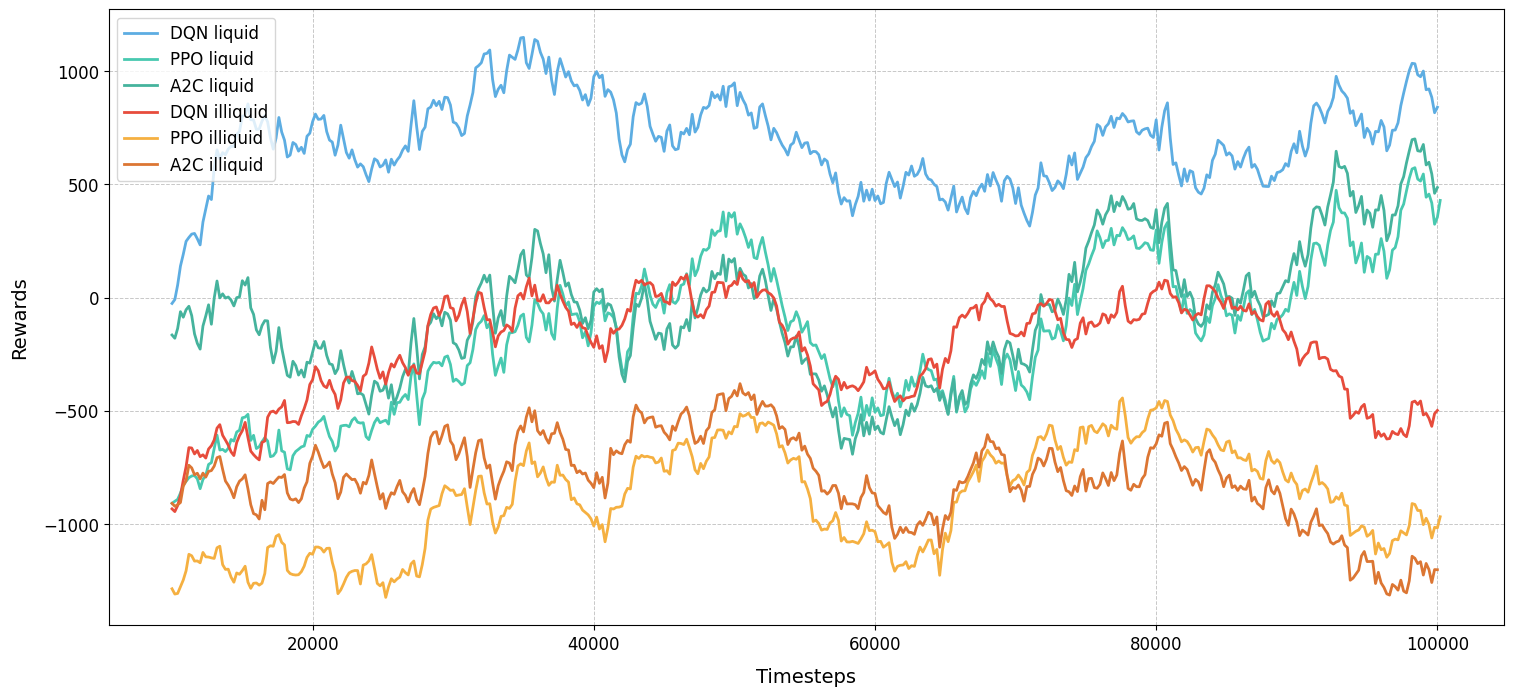

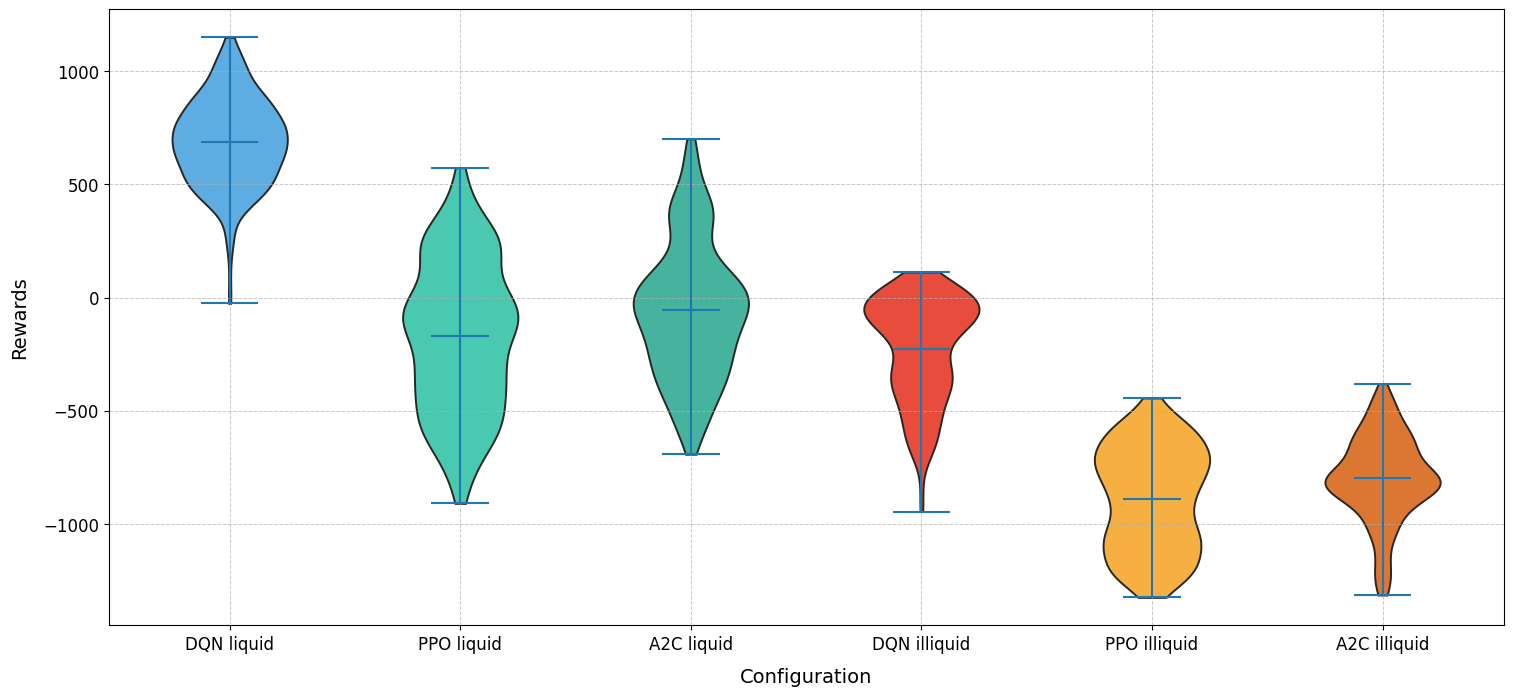

In [28]:
dir = '../models/trained_models/12-08-2024_14:38/'

labels = ['DQN/liquid', 'PPO/liquid', 'A2C/liquid', 'DQN/illiquid', 'PPO/illiquid', 'A2C/illiquid']
display_labels = ['DQN liquid', 'PPO liquid', 'A2C liquid', 'DQN illiquid', 'PPO illiquid', 'A2C illiquid']
plot_learning_results([dir+labels[0], dir+labels[1], dir+labels[2], dir+labels[3], dir+labels[4], dir+labels[5]], display_labels, '')
plot_violin([dir+labels[0], dir+labels[1], dir+labels[2], dir+labels[3], dir+labels[4], dir+labels[5]], display_labels, '')

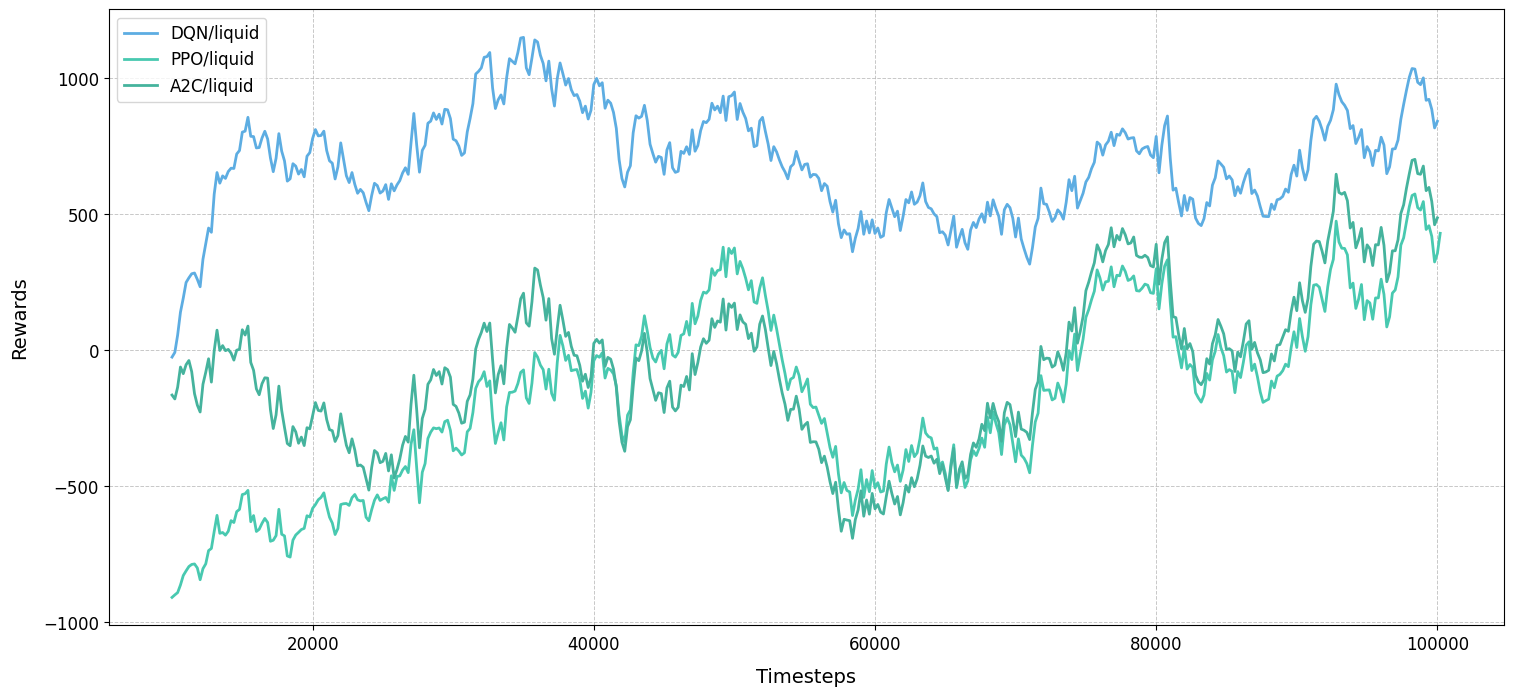

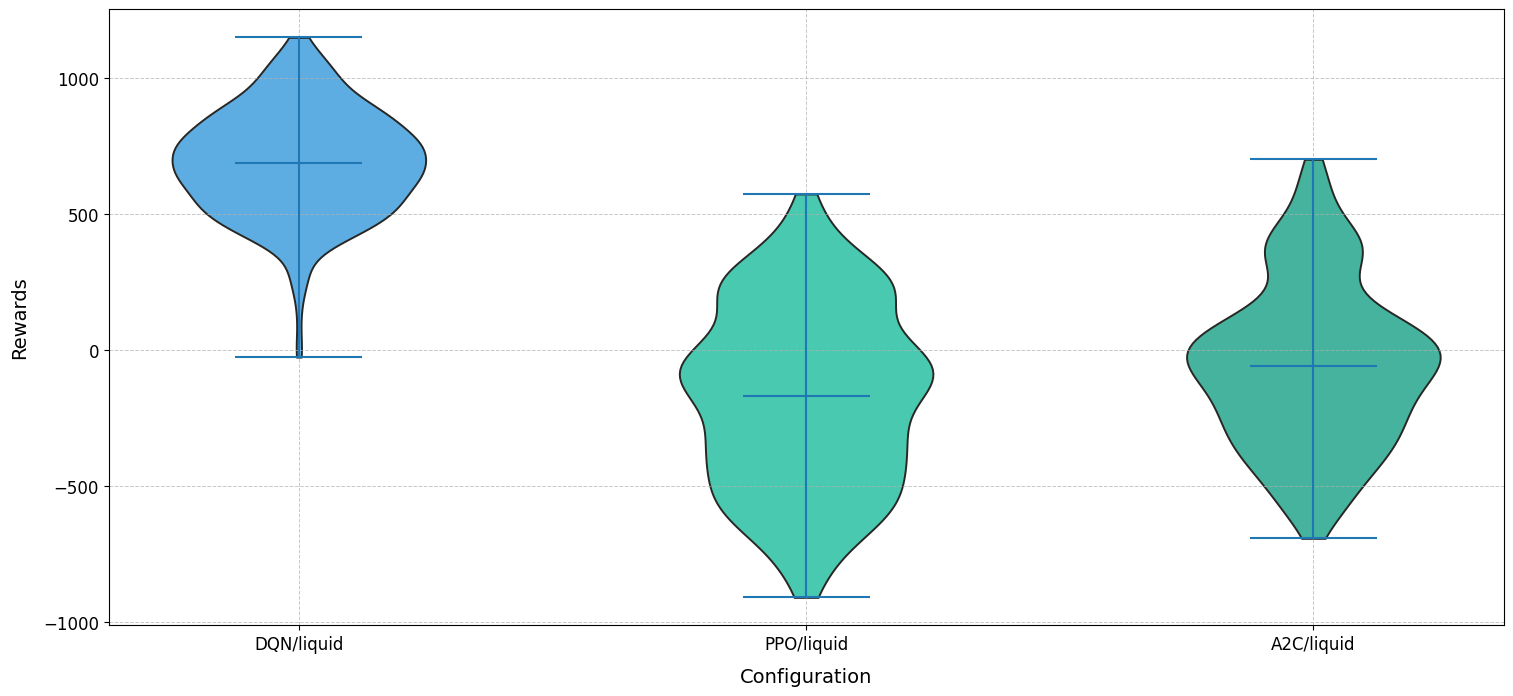

In [29]:
dir = '../models/trained_models/12-08-2024_14:38/'

labels = ['DQN/liquid', 'PPO/liquid', 'A2C/liquid']
plot_learning_results([dir+labels[0], dir+labels[1], dir+labels[2]], labels, '')
plot_violin([dir+labels[0], dir+labels[1], dir+labels[2]], labels, '')

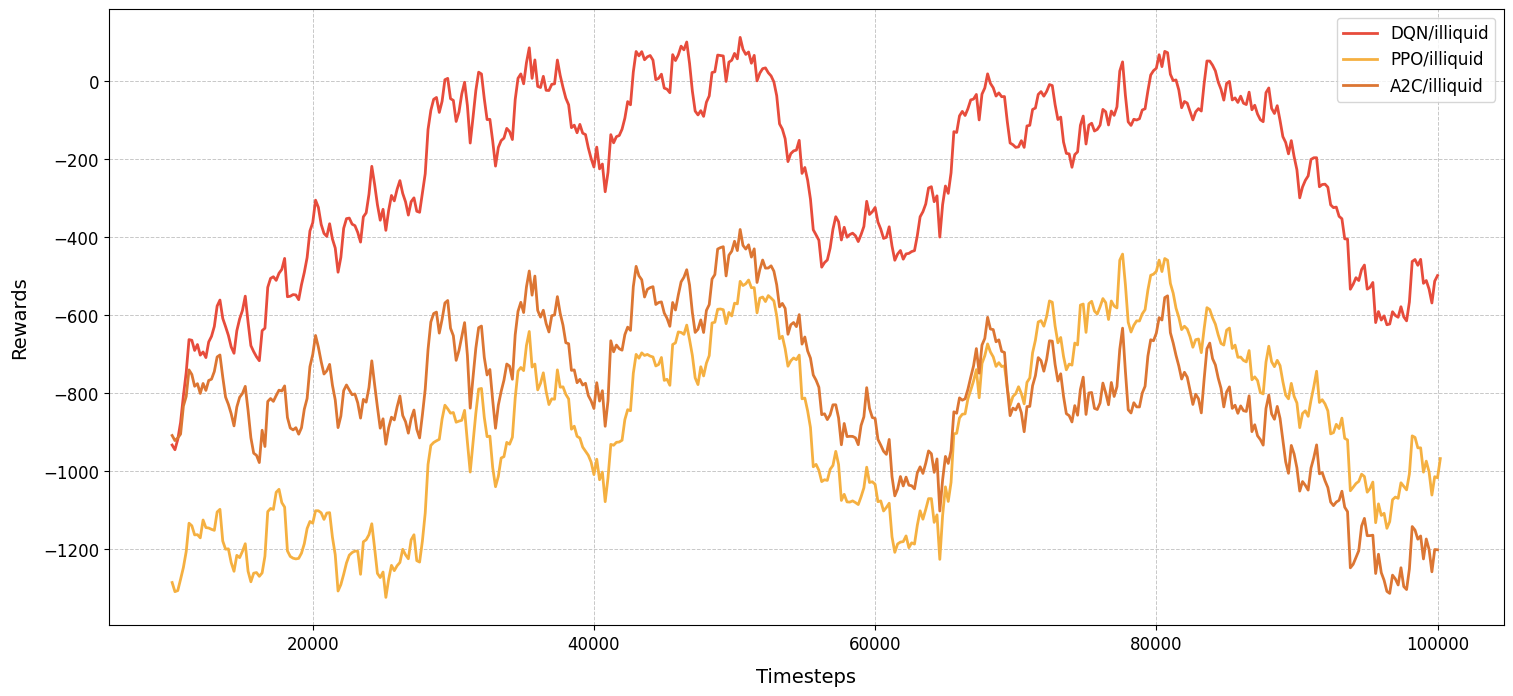

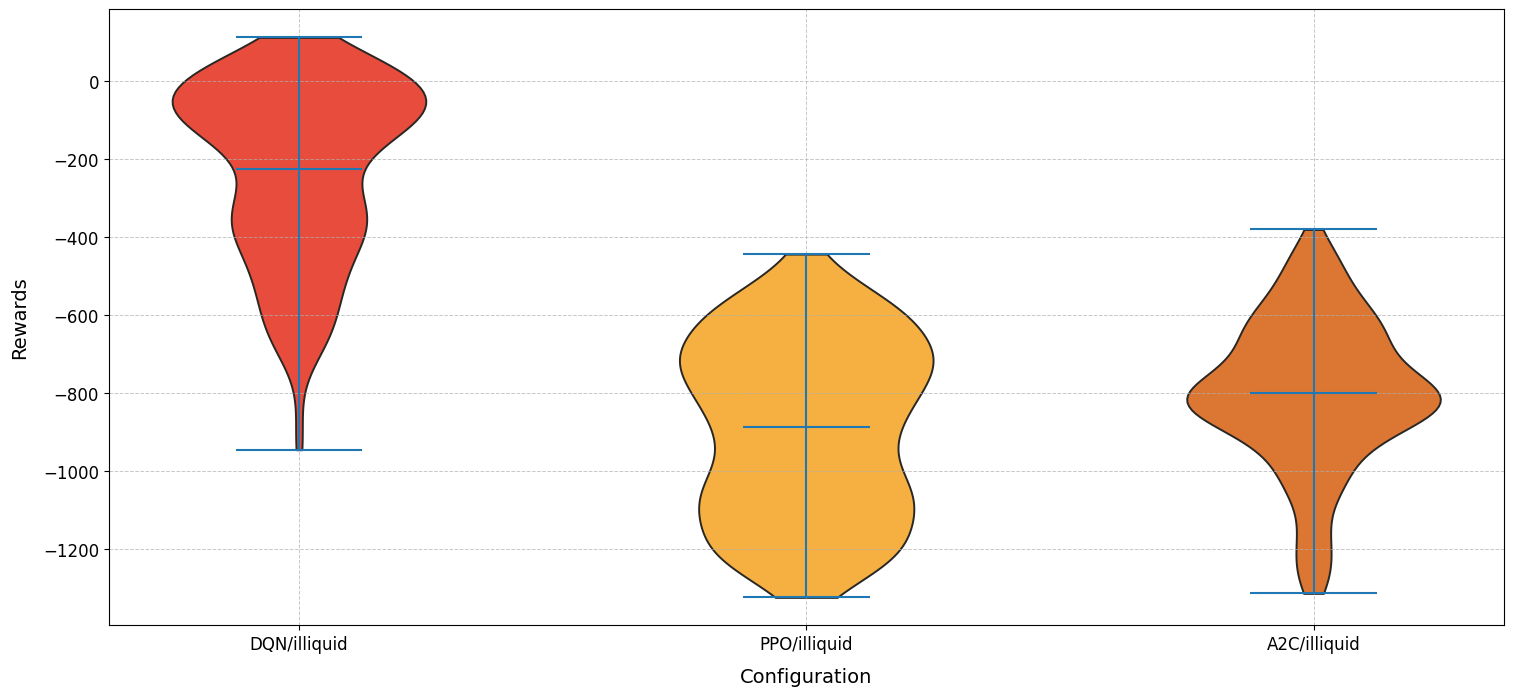

In [30]:
dir = '../models/trained_models/12-08-2024_14:38/'

labels = ['DQN/illiquid', 'PPO/illiquid', 'A2C/illiquid']
plot_learning_results([dir+labels[0], dir+labels[1], dir+labels[2]], labels, '', second_color=True)
plot_violin([dir+labels[0], dir+labels[1], dir+labels[2]], labels, '', second_color=True)

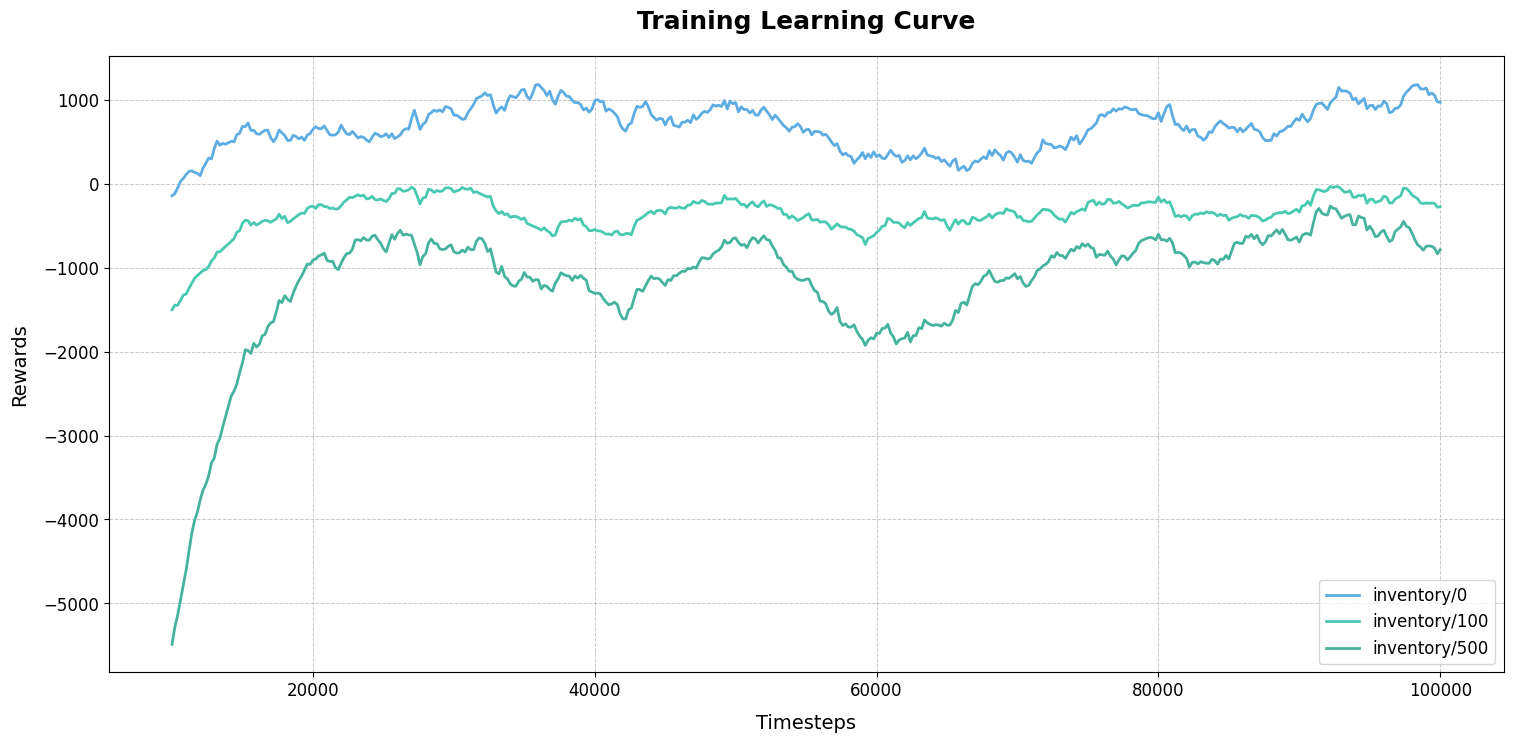

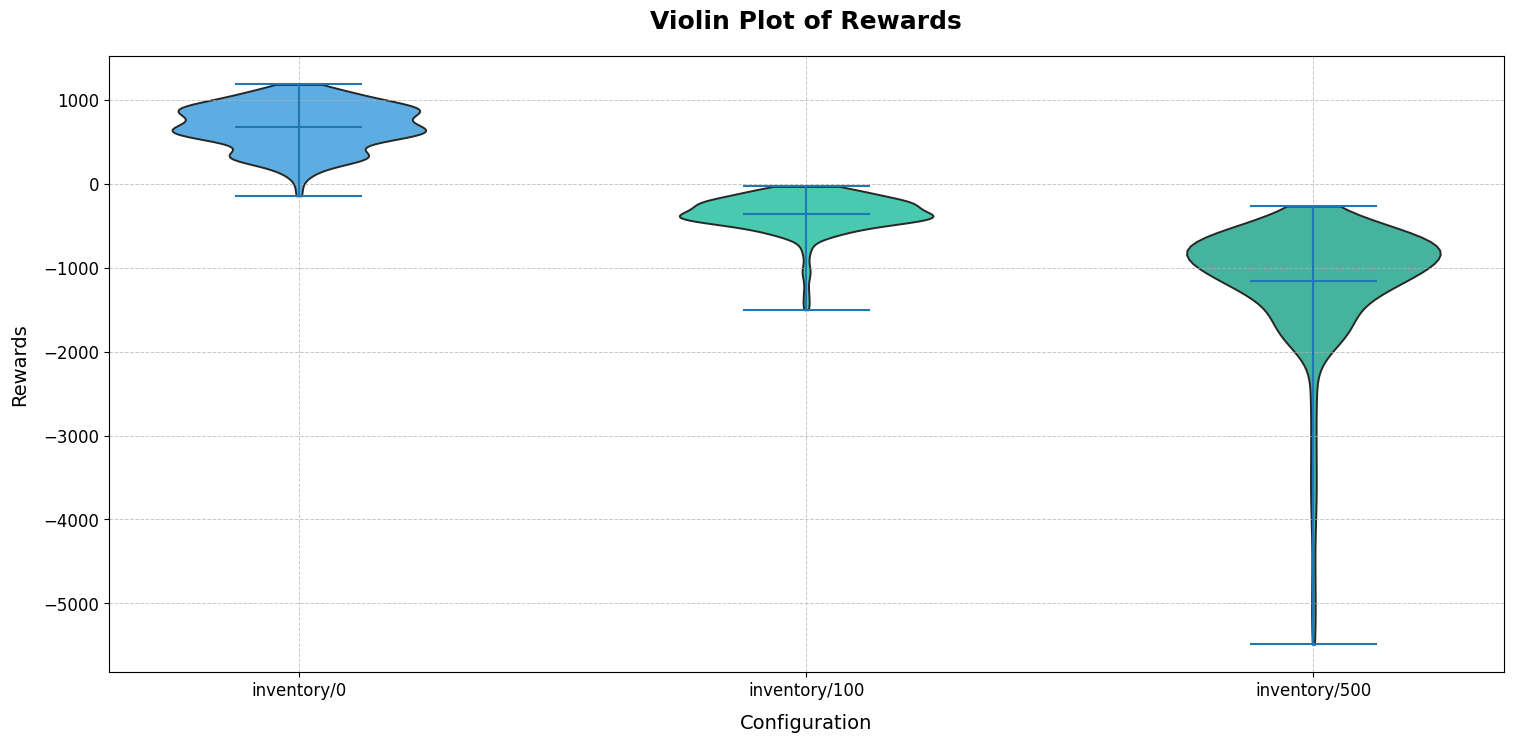

In [31]:
dir = '../models/trained_models/12-08-2024_14:38/DQN/'

labels = ['inventory/0', 'inventory/100', 'inventory/500']
plot_learning_results([dir+labels[0], dir+labels[1], dir+labels[2]], labels)
plot_violin([dir+labels[0], dir+labels[1], dir+labels[2]], labels)

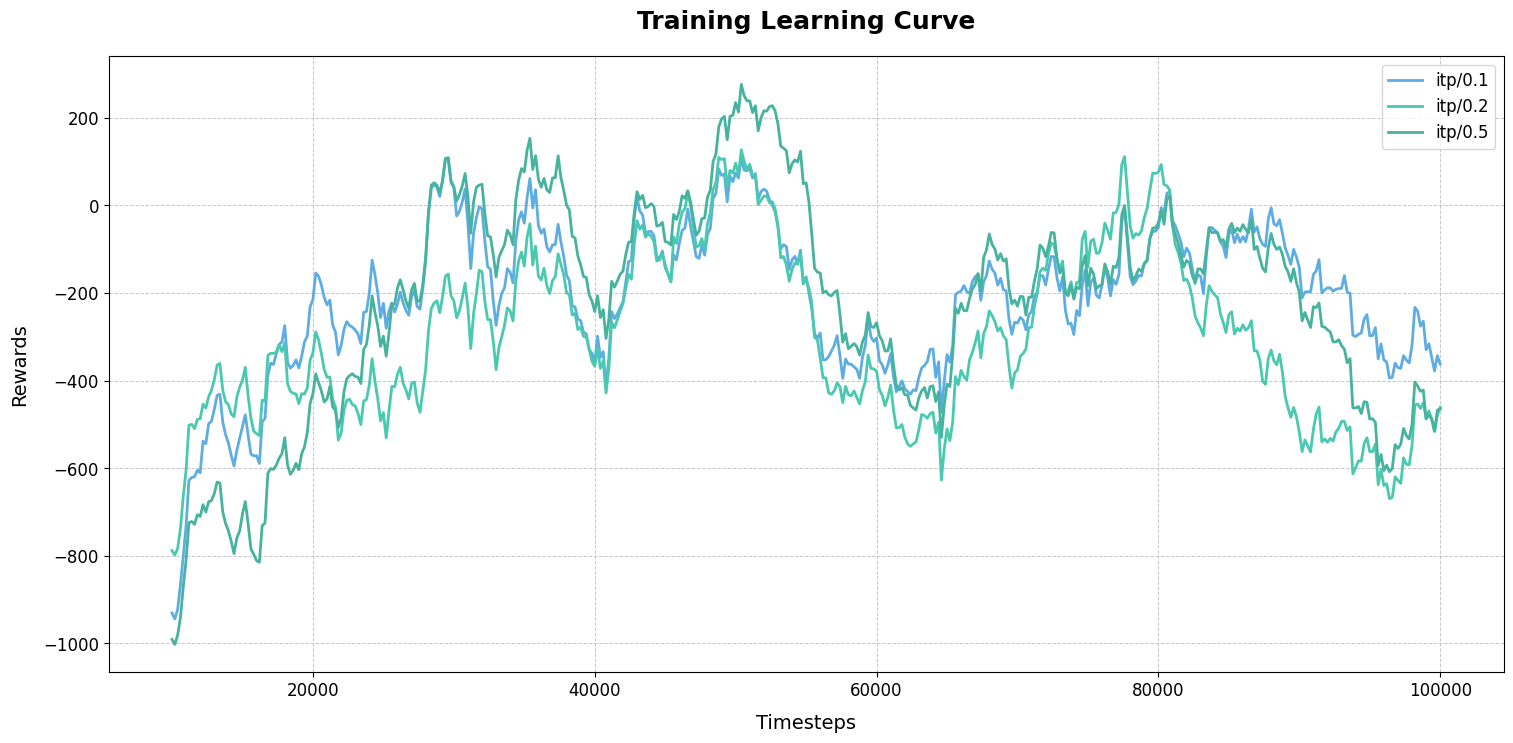

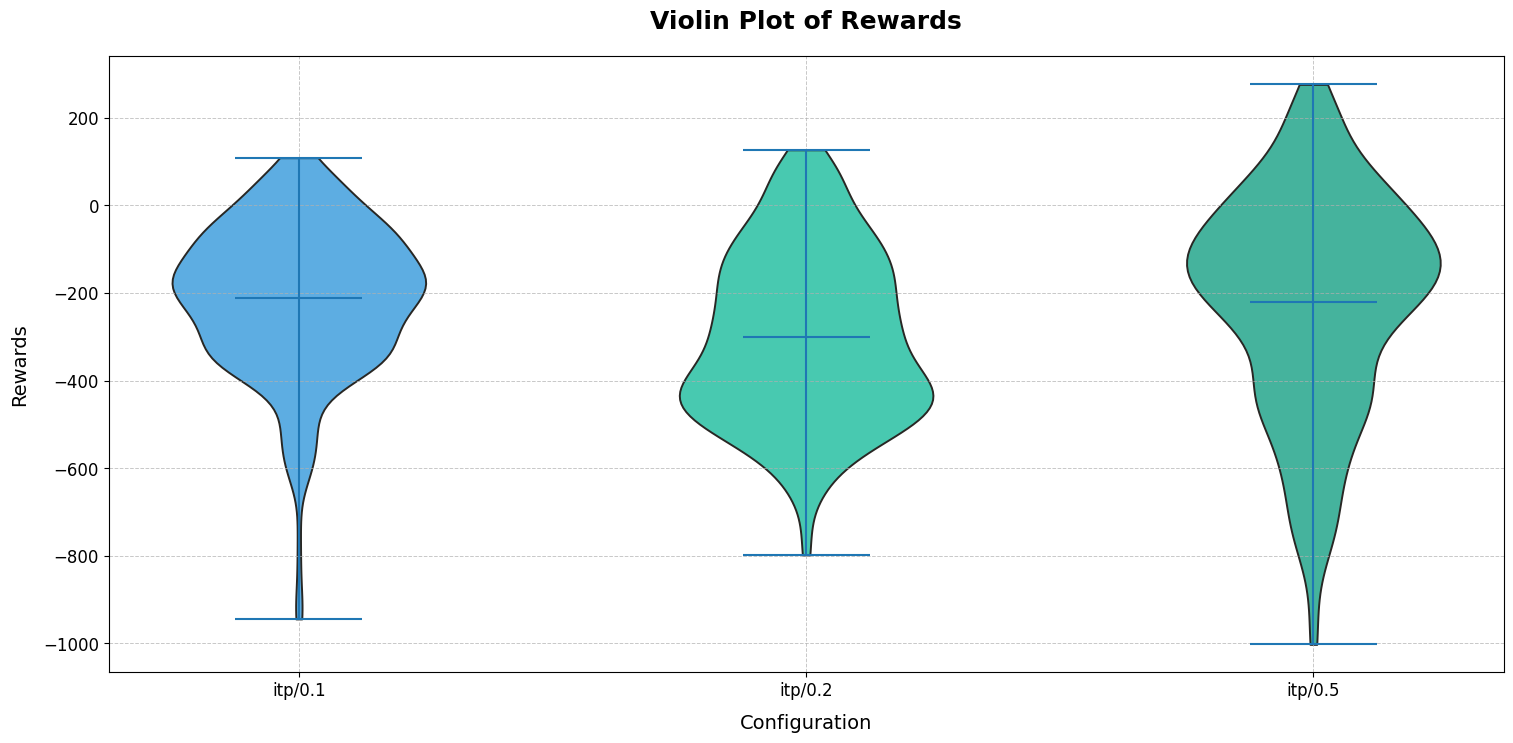

In [32]:
dir = '../models/trained_models/12-08-2024_14:38/DQN/'

labels = ['itp/0.1', 'itp/0.2', 'itp/0.5']
plot_learning_results([dir+labels[0], dir+labels[1], dir+labels[2]], labels)
plot_violin([dir+labels[0], dir+labels[1], dir+labels[2]], labels)

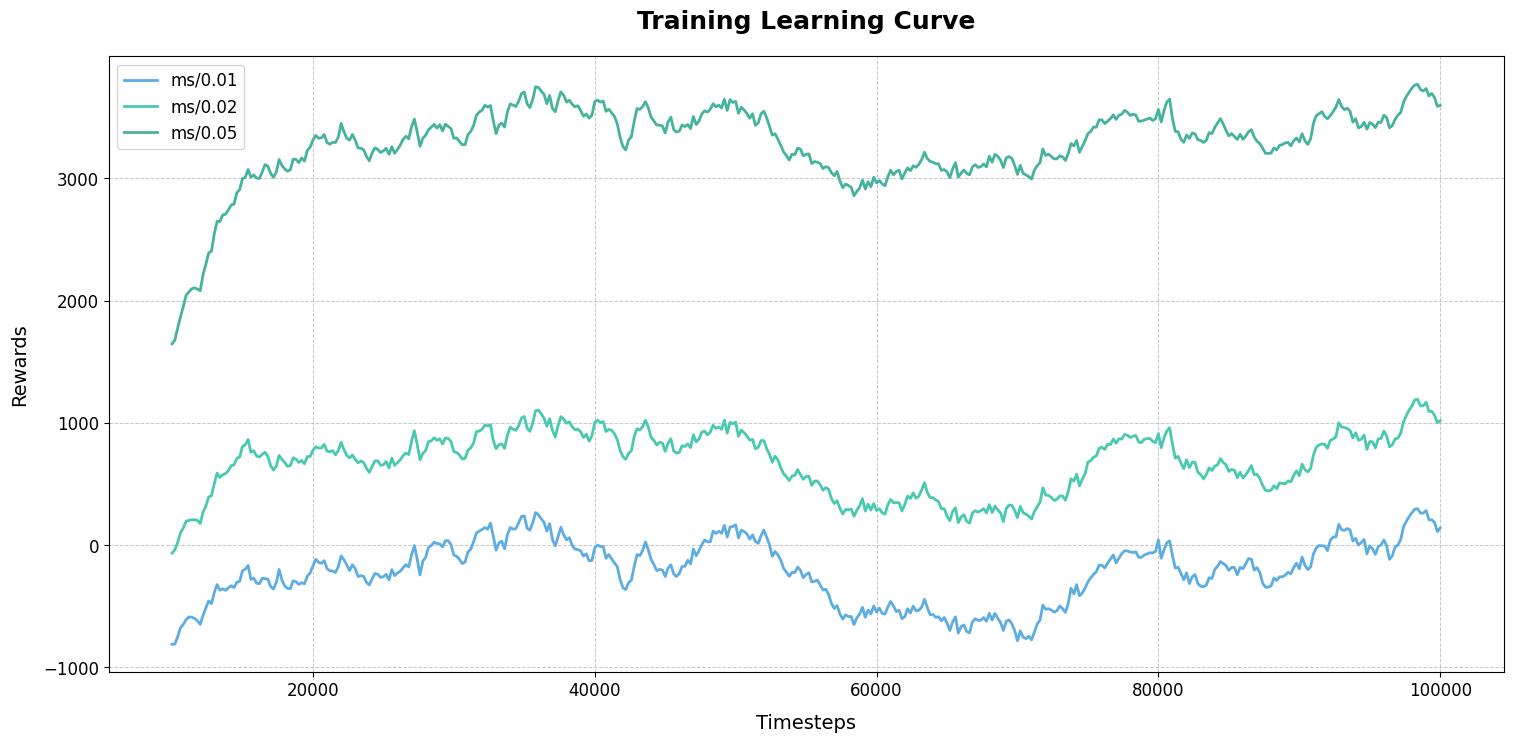

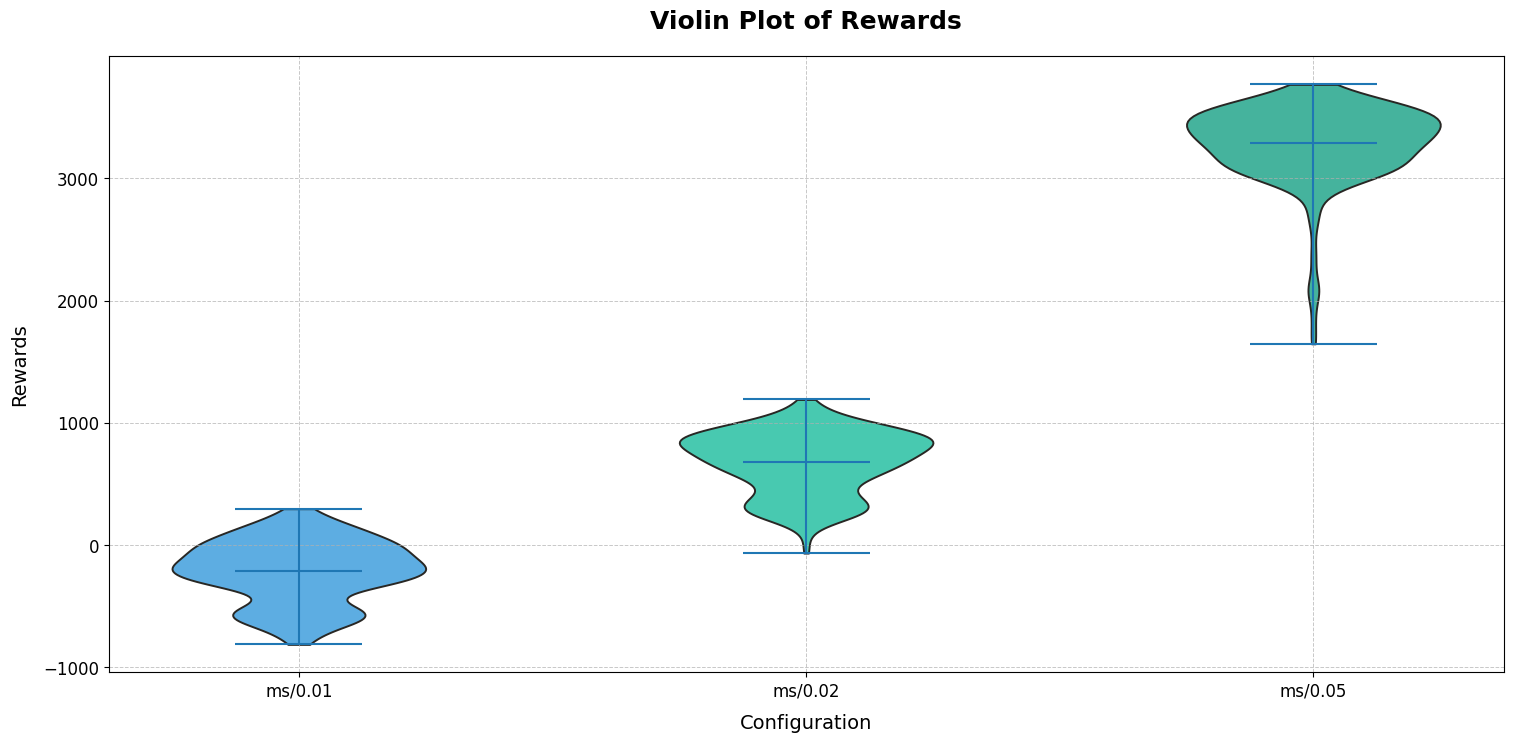

In [33]:
dir = '../models/trained_models/12-08-2024_14:38/DQN/'

labels = ['ms/0.01', 'ms/0.02', 'ms/0.05']
plot_learning_results([dir+labels[0], dir+labels[1], dir+labels[2]], labels)
plot_violin([dir+labels[0], dir+labels[1], dir+labels[2]], labels)

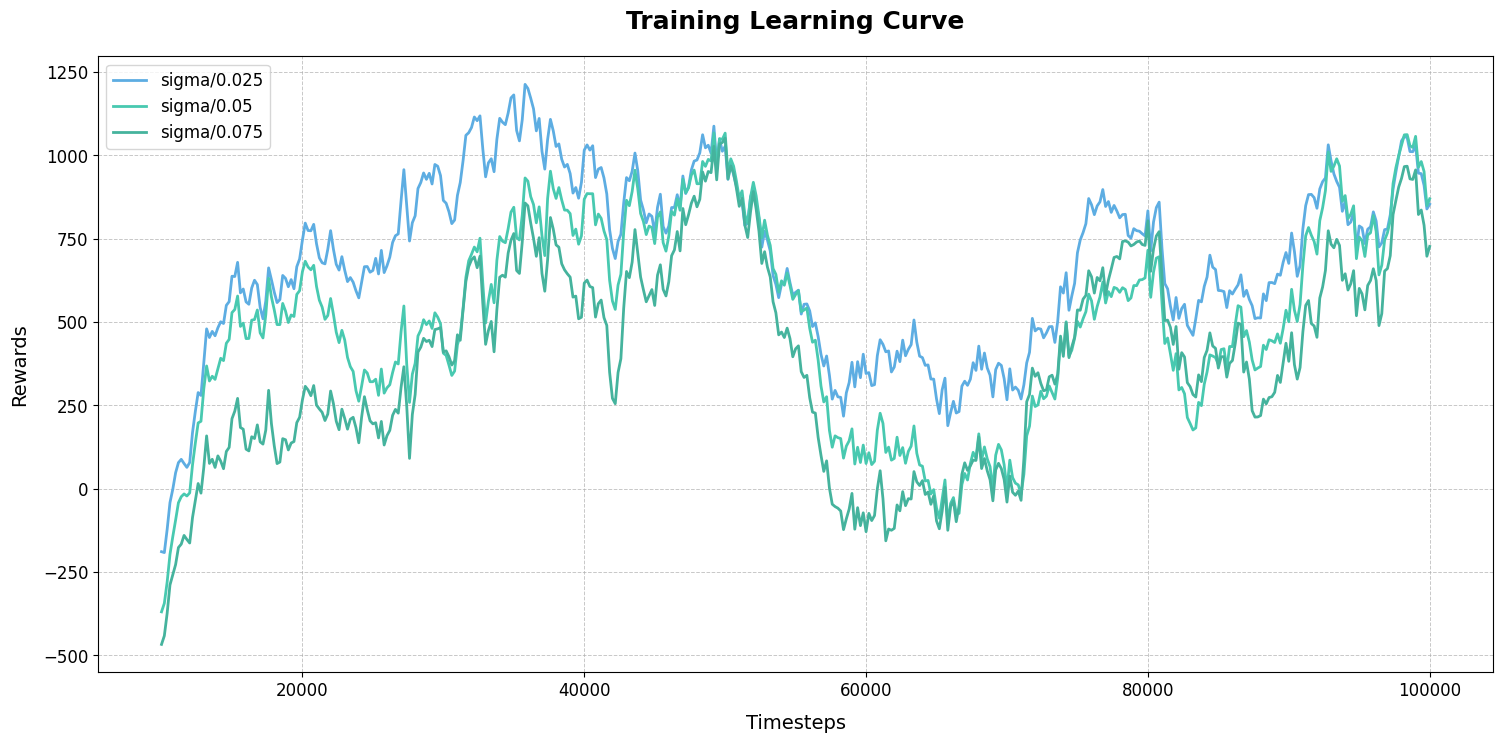

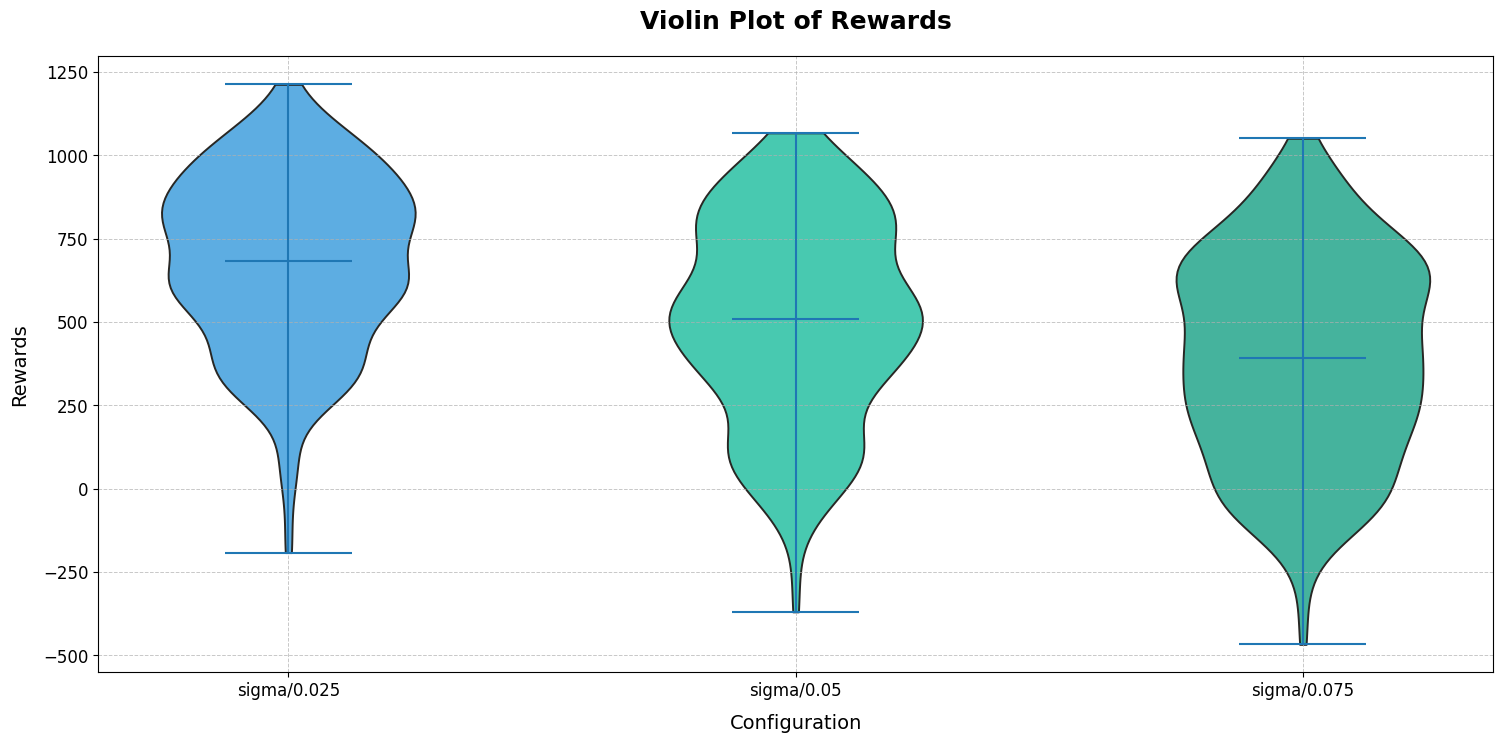

In [34]:
dir = '../models/trained_models/12-08-2024_14:38/DQN/'

labels = ['sigma/0.025', 'sigma/0.05', 'sigma/0.075']
plot_learning_results([dir+labels[0], dir+labels[1], dir+labels[2]], labels)
plot_violin([dir+labels[0], dir+labels[1], dir+labels[2]], labels)

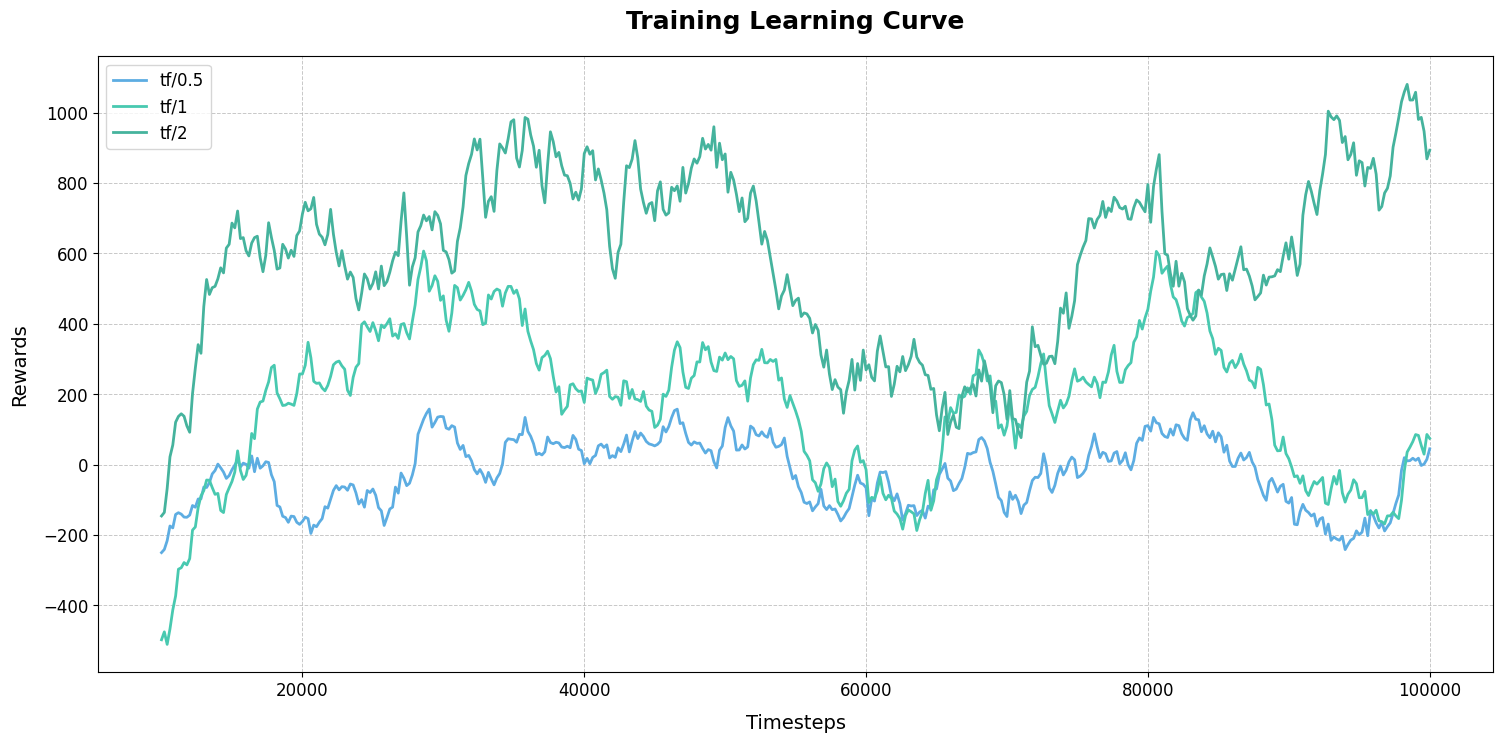

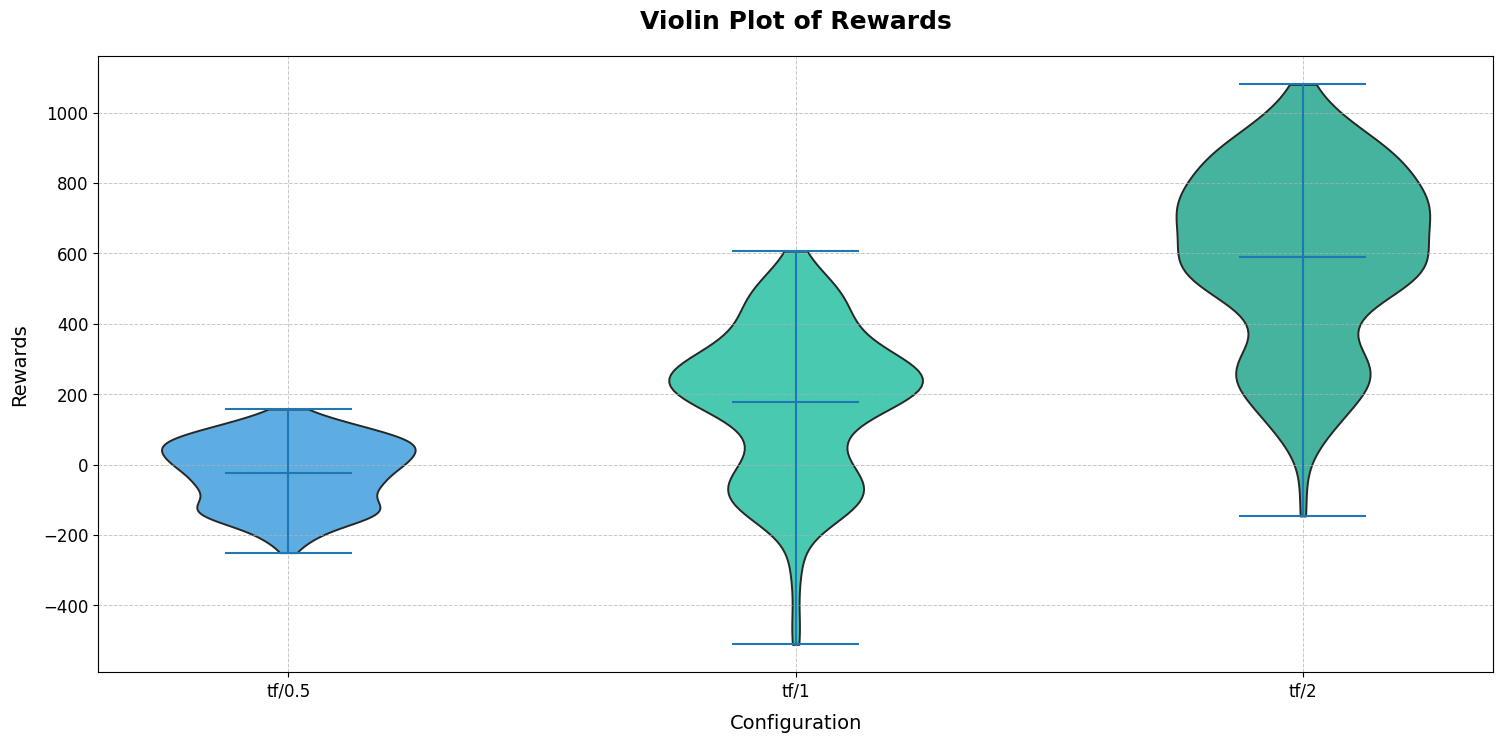

In [35]:
dir = '../models/trained_models/12-08-2024_14:38/DQN/'

labels = ['tf/0.5', 'tf/1', 'tf/2']
plot_learning_results([dir+labels[0], dir+labels[1], dir+labels[2]], labels)
plot_violin([dir+labels[0], dir+labels[1], dir+labels[2]], labels)

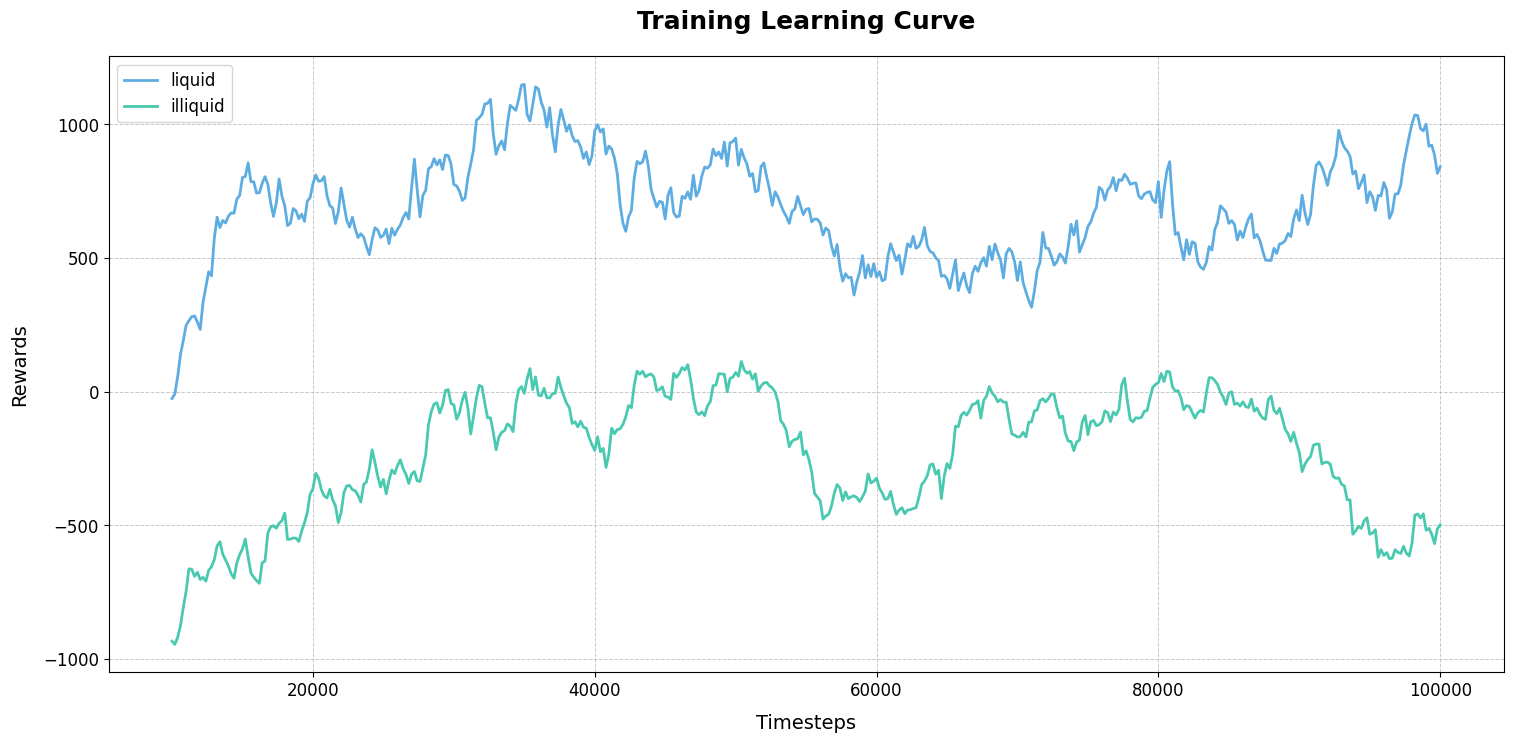

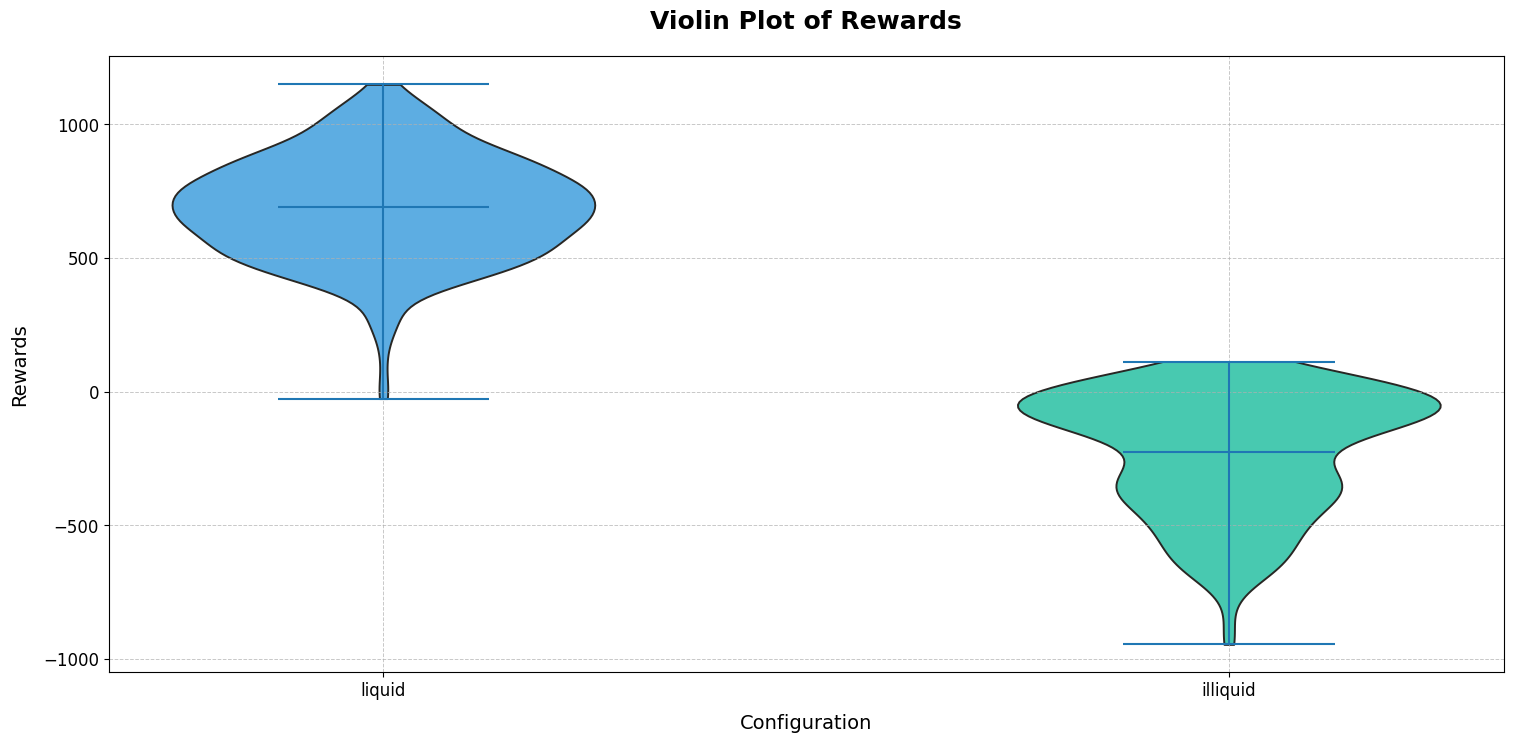

In [36]:
dir = '../models/trained_models/12-08-2024_14:38/DQN/'

labels = ['liquid', 'illiquid']
plot_learning_results([dir+labels[0], dir+labels[1]], labels)
plot_violin([dir+labels[0], dir+labels[1]], labels)

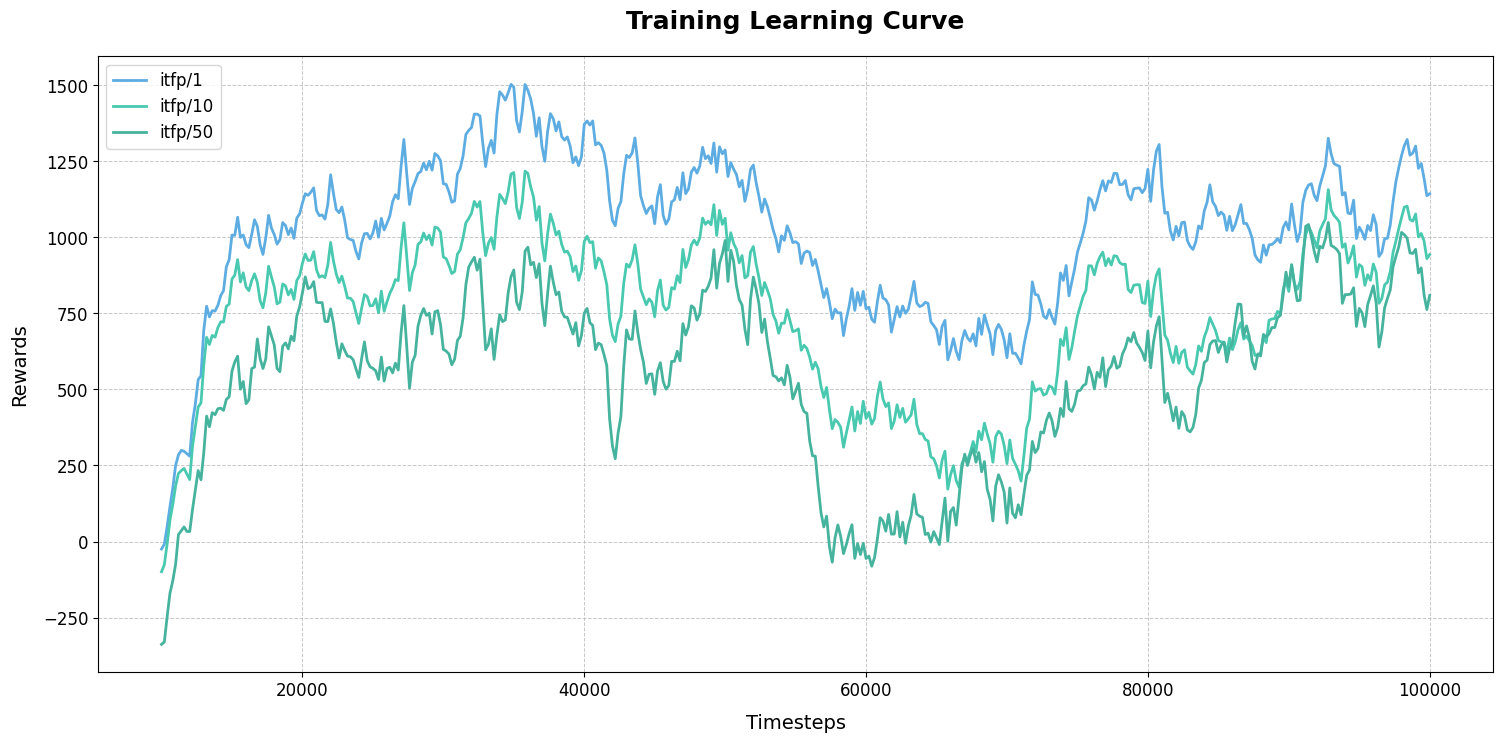

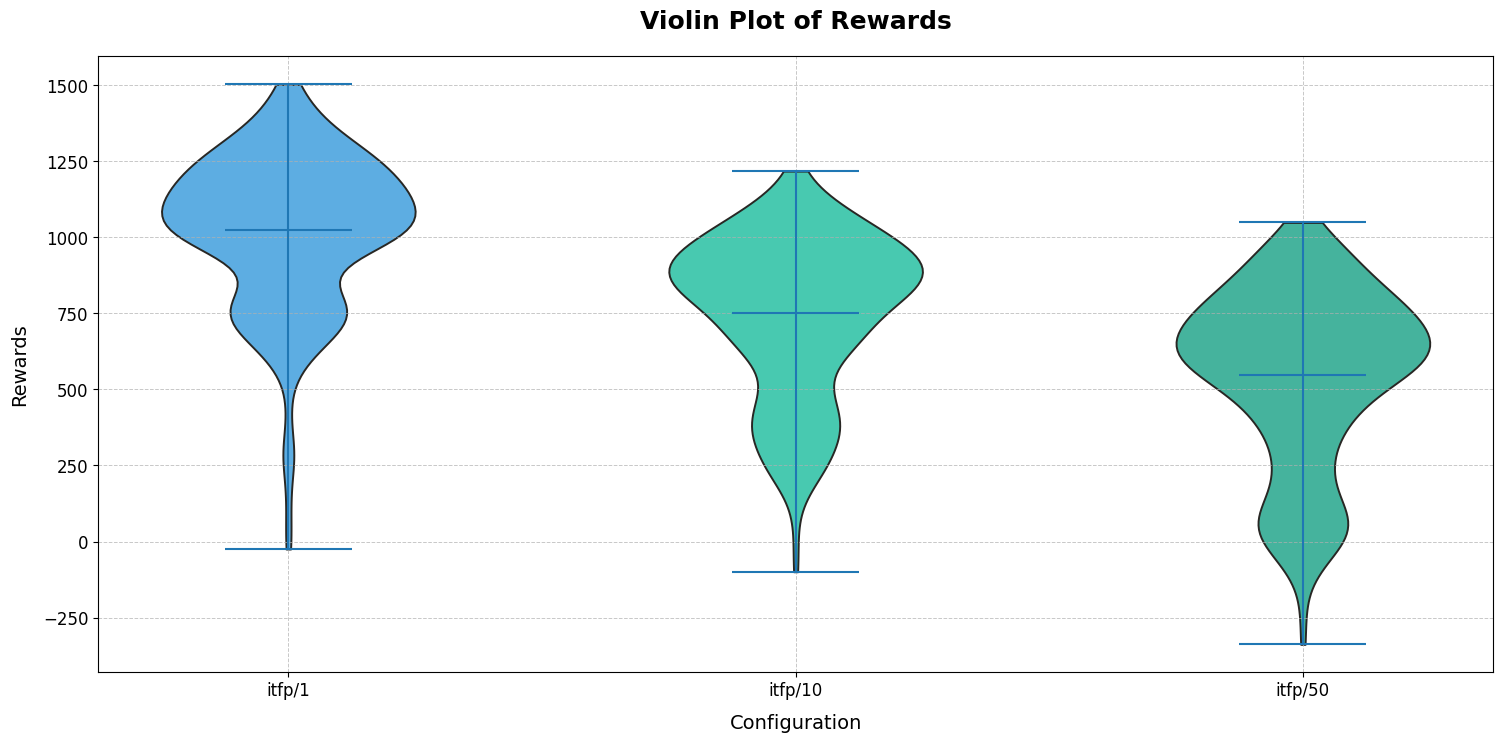

In [37]:
dir = '../models/trained_models/12-08-2024_14:38/DQN/'

labels = ['itfp/1', 'itfp/10', 'itfp/50']
plot_learning_results([dir+labels[0], dir+labels[1], dir+labels[2]], labels)
plot_violin([dir+labels[0], dir+labels[1], dir+labels[2]], labels)

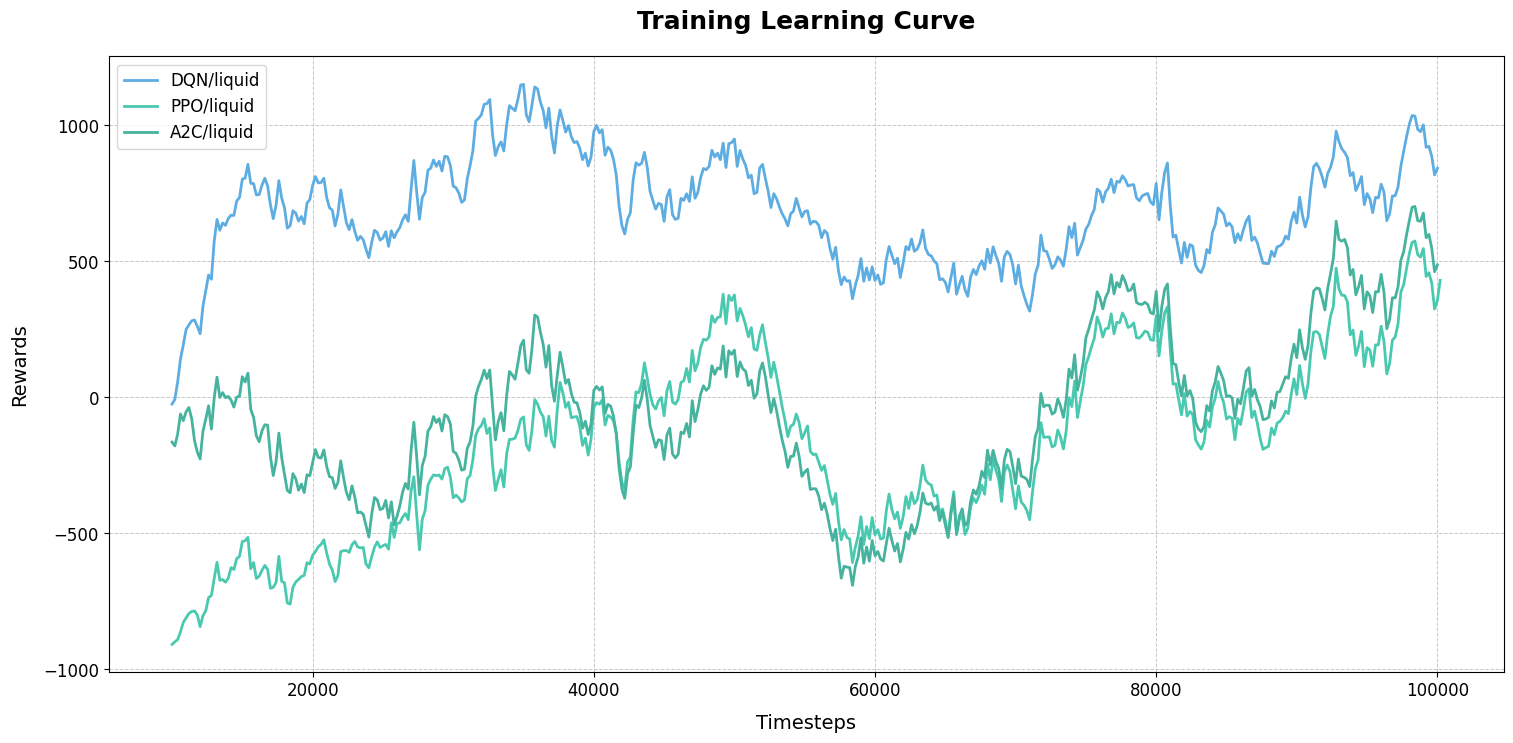

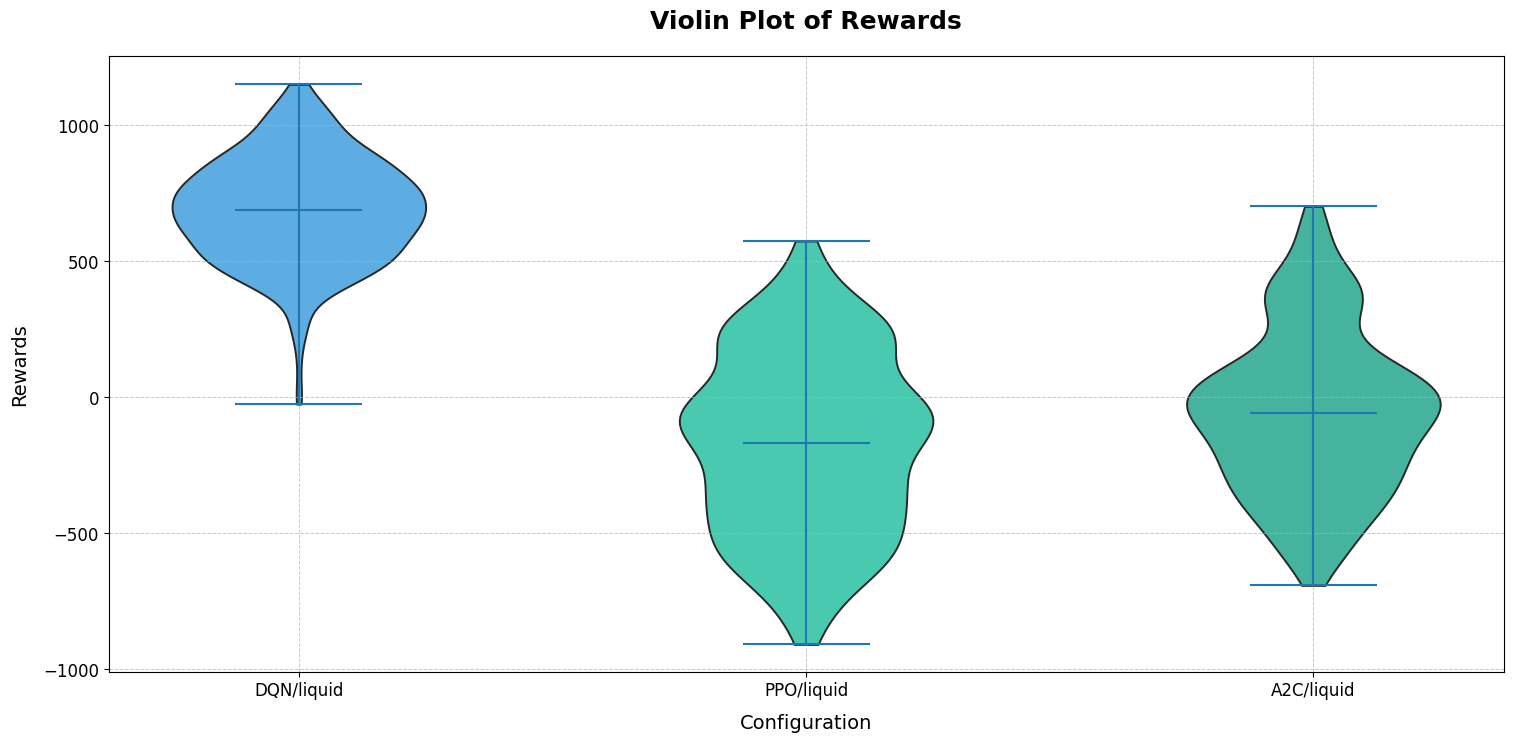

In [38]:
dir = '../models/trained_models/12-08-2024_14:38/'

labels = ['DQN/liquid', 'PPO/liquid', 'A2C/liquid']
plot_learning_results([dir+labels[0], dir+labels[1], dir+labels[2]], labels)
plot_violin([dir+labels[0], dir+labels[1], dir+labels[2]], labels)

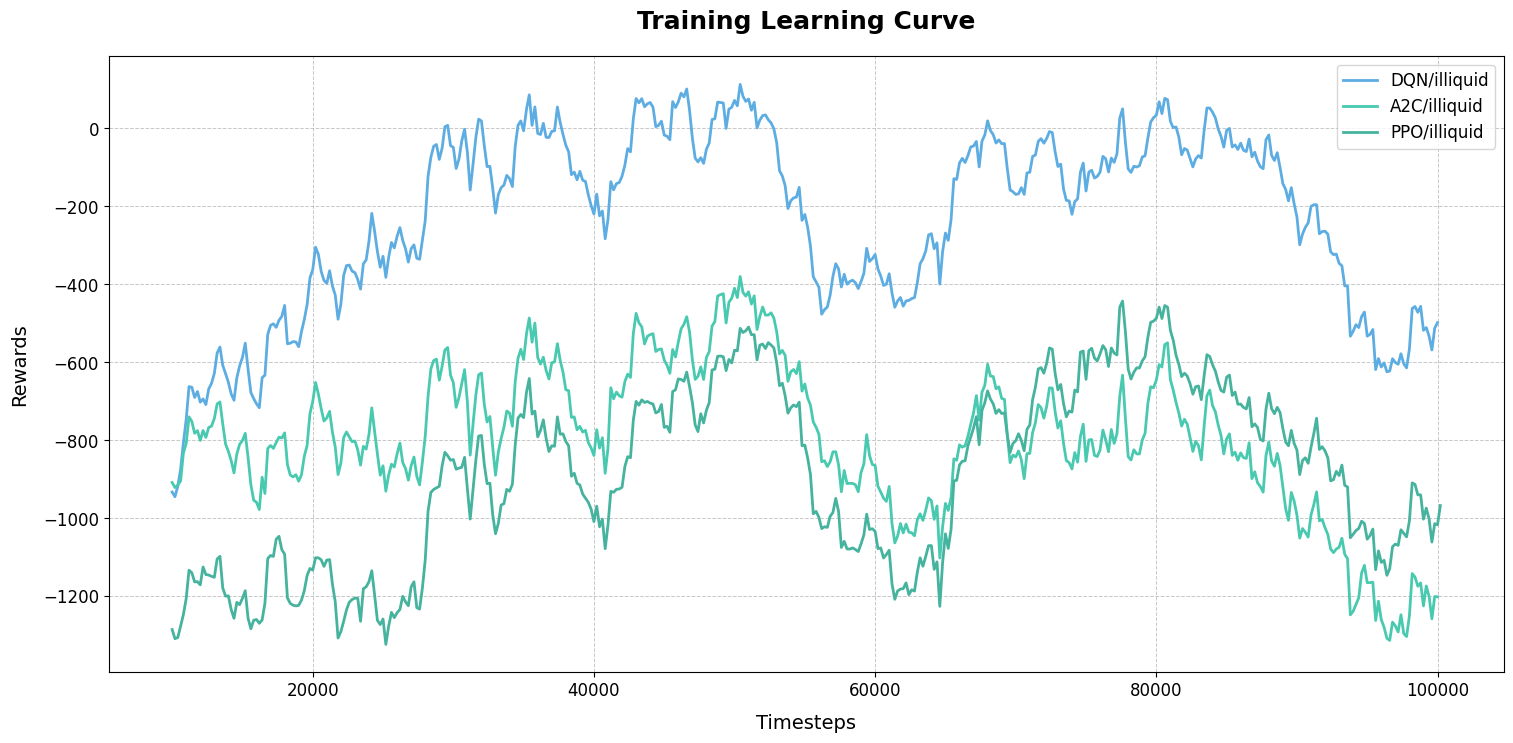

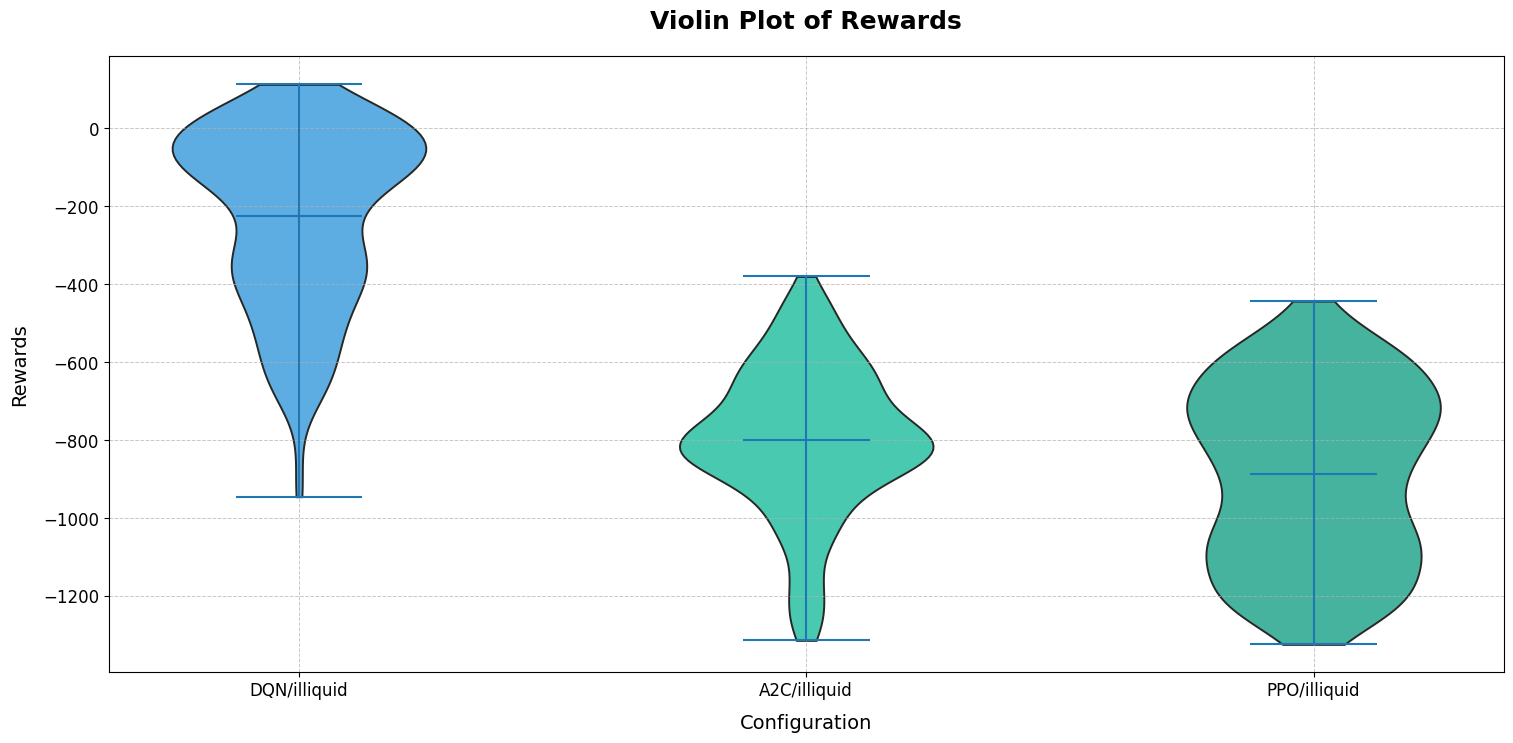

In [39]:
dir = '../models/trained_models/12-08-2024_14:38/'

labels = ['DQN/illiquid', 'A2C/illiquid', 'PPO/illiquid']
plot_learning_results([dir+labels[0], dir+labels[1], dir+labels[2]], labels)
plot_violin([dir+labels[0], dir+labels[1], dir+labels[2]], labels)

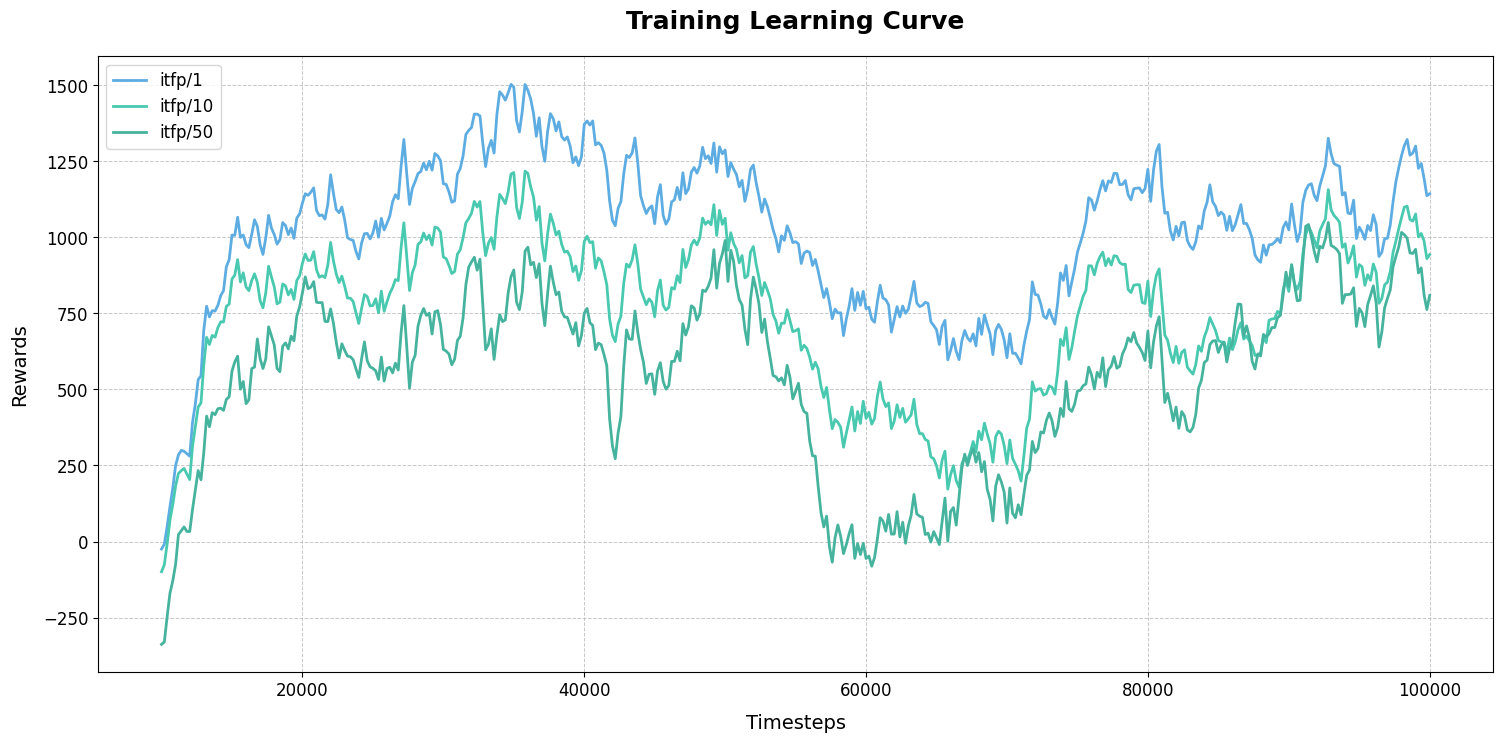

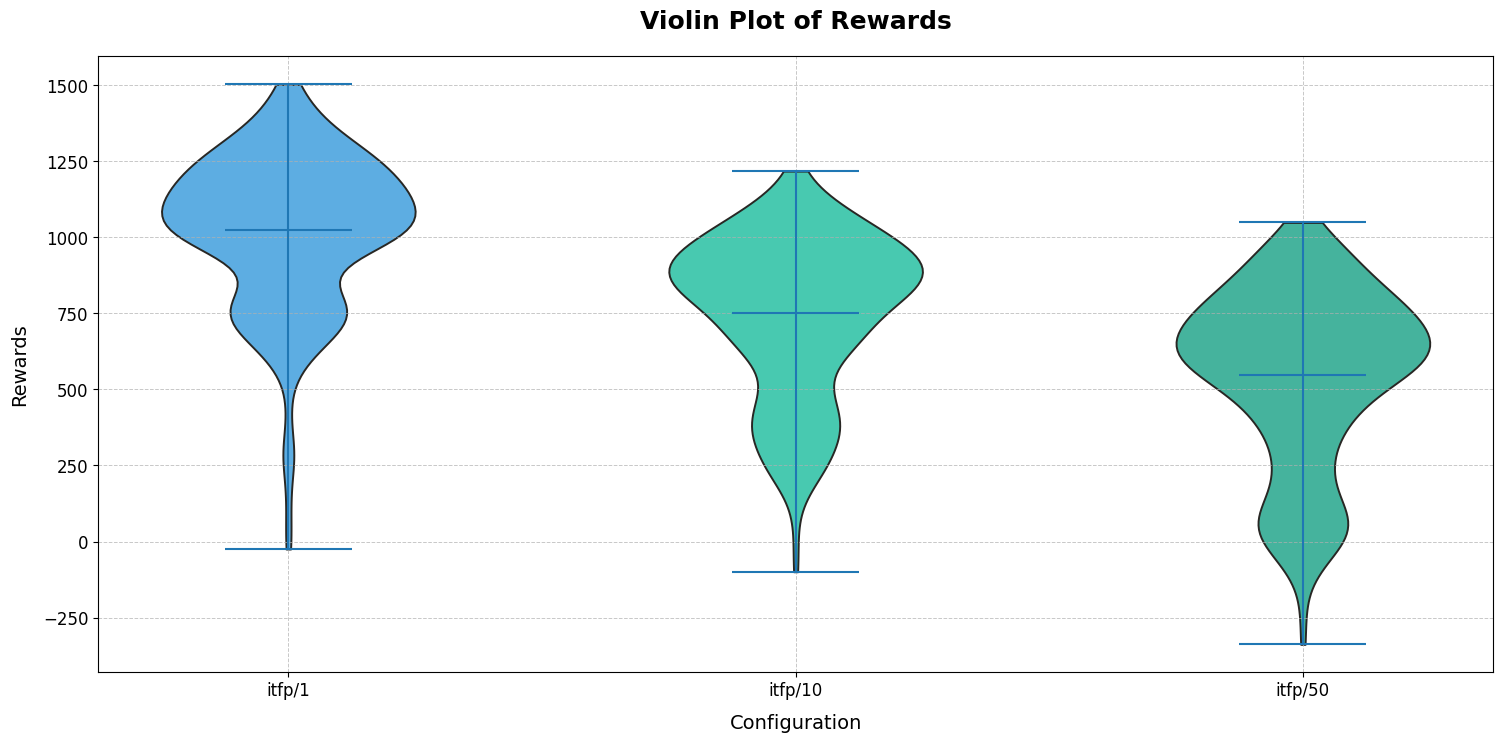

In [40]:
dir = '../models/trained_models/12-08-2024_14:38/DQN/'

labels = ['itfp/1', 'itfp/10', 'itfp/50']
plot_learning_results([dir+labels[0], dir+labels[1], dir+labels[2]], labels)
plot_violin([dir+labels[0], dir+labels[1], dir+labels[2]], labels)

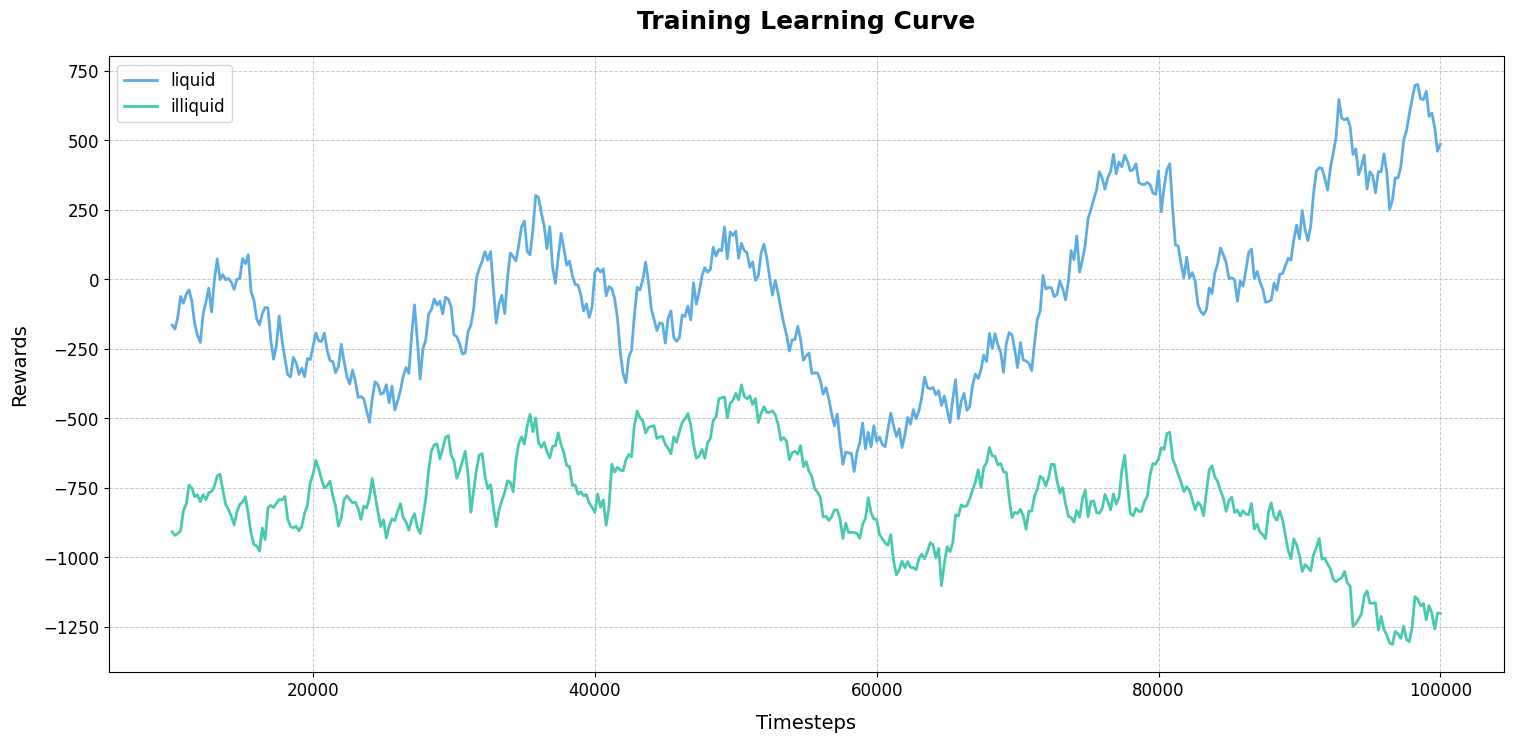

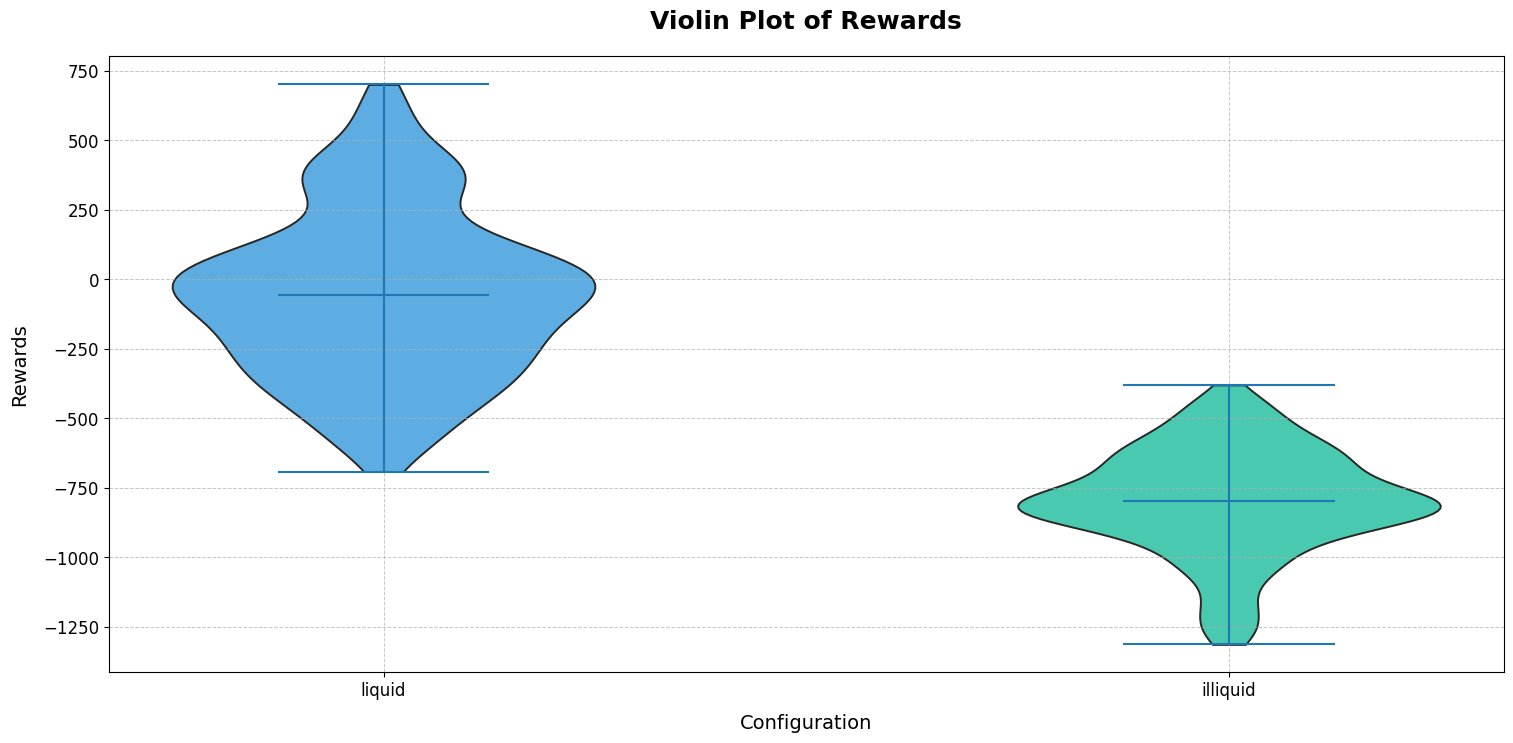

In [41]:
dir = '../models/trained_models/12-08-2024_14:38/A2C/'

labels = ['liquid', 'illiquid']
plot_learning_results([dir+labels[0], dir+labels[1]], labels)
plot_violin([dir+labels[0], dir+labels[1]], labels)